In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

# 自訂 function 可重新 reload
from importlib import reload
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

# prediction

In [2]:


# 3_all
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_all/T200_beta00.0001_betaT0.02/imputaiton_multiple_40k/'
# dataset_folder = 'datasets/NYISO/dataset_3/all/'
# dataset_filename = 'load_array_all_test.npy'

# 3_CAPITL
main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
result_folder = 'results/NYISO_3_CAPITL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
dataset_folder = 'datasets/NYISO/dataset_3/zone/'
dataset_filename = 'CAPITL_test.npy'

# 3_CENTRL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_CENTRL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'CENTRL_test.npy'

# 3_DUNWOD
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_DUNWOD/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'DUNWOD_test.npy'

# 3_GENESE
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_GENESE/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'GENESE_test.npy'

# 3_HUD VL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_HUD VL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'HUD VL_test.npy'

# 3_LONGIL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_LONGIL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'LONGIL_test.npy'

# 3_MHK VL
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_MHK VL/T200_beta00.0001_betaT0.02/imputaiton_multiple_20k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'MHK VL_test.npy'

# 3_MILLWD
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_MILLWD/T200_beta00.0001_betaT0.02/imputaiton_multiple/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'MILLWD_test.npy'

# 3_NYC
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_NYC/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'N.Y.C._test.npy'

# 3_NORTH
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_NORTH/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'NORTH_test.npy'

# 3_WEST
# main_folder = '/home/hchuang/Documents/Project/SSSD_CP/src/'
# result_folder = 'results/NYISO_3_WEST/T200_beta00.0001_betaT0.02/imputaiton_multiple_50k/'
# dataset_folder = 'datasets/NYISO/dataset_3/zone/'
# dataset_filename = 'WEST_test.npy'

In [3]:
pred_data = read_multiple_imputations(main_folder + result_folder, 24)
print(pred_data.shape)

file_path = os.path.join(main_folder + result_folder, 'original0.npy')
true_data = np.load(file_path)
print(true_data.shape)
true_data_target = true_data[:,:,-24:]
print(true_data_target.shape)

file_path = os.path.join(main_folder + dataset_folder, dataset_filename)
true_data_o = np.swapaxes(np.load(file_path), axis1=1, axis2=2)
print(true_data_o.shape)

true_data_o_cond = true_data_o[:,:,0:168]
print(true_data_o_cond.shape)
true_data_o_target = true_data_o[:,:,-24:]
print(true_data_o_target.shape)

(1, 73, 1, 24)
(73, 1, 192)
(73, 1, 24)
(73, 1, 192)
(73, 1, 168)
(73, 1, 24)


In [4]:
pred_mean = np.mean(pred_data, axis = 0)
print(pred_mean.shape)

m = np.mean(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))
s = np.std(true_data_o_cond, axis=2).reshape((pred_mean.shape[0], pred_mean.shape[1], 1))

pred_mean_o = pred_mean*s + m
print(pred_mean_o.shape)


(73, 1, 24)
(73, 1, 24)


2016/10/23


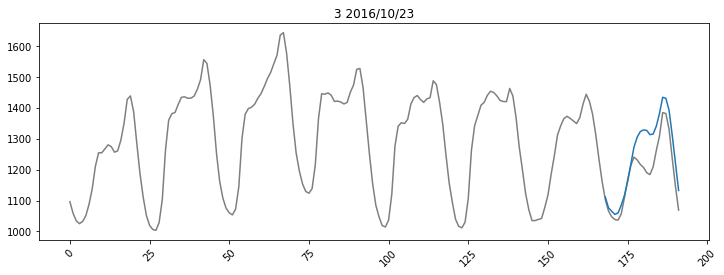

In [5]:
obs = 3
date = generate_date_from_seq(obs)
print(date)
x = range(0,192)
y = true_data_o[obs,0,:]
x_pred = range(168, 192)
y_pred = pred_mean_o[obs,0,:]


plt.figure(figsize=(12, 4)) 
plt.plot(x, y, color = 'tab:gray')
plt.plot(x_pred, y_pred, color = 'tab:blue')
plt.title(str(obs)+ ' ' +date)
plt.xticks(rotation=45) 
# plt.ylim(-2.5, 2.5) 
plt.show()



In [30]:
# for obs in range(50,60,1):
#     date = generate_date_from_seq(obs)
#     print(date)
#     x = range(0,192)
#     y = true_data_o[obs,0,:]
#     x_pred = range(168, 192)
#     y_pred = pred_mean_o[obs,0,:]


#     plt.figure(figsize=(12, 4)) 
#     plt.plot(x, y, color = 'tab:gray')
#     plt.plot(x_pred, y_pred, color = 'tab:blue')
#     # plt.title("mean prediction: " + date)
#     plt.xticks(rotation=45) 
#     # plt.ylim(-2.5, 2.5) 
#     plt.show()
